In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
import os

from src.utils.processing import creat_dataset, split_timestamp

base = "../data/Deployment_2/"

## 1. Load datasets

In [2]:
activities = pd.read_csv(base + "Activities.csv")
activities.head()

,TimeStamp,SensorID,Value,EnumerationID,ValueID,Name
0,2013-04-14 20:15:00,100,2,1,2,Watching TV
1,2013-04-14 21:45:00,100,10,1,10,Ignore
2,2013-04-14 22:00:00,100,11,1,11,Reading
3,2013-04-14 23:00:00,100,10,1,10,Ignore
4,2013-04-14 23:15:00,100,1,1,1,Sleeping


In [4]:
sensor_history = pd.read_csv(base + "Deployment_2_sensor_preprocessing_data.csv")
sensor_history.head()

,Date,Hour,Minute,Value,SensorID,TimeID
0,2013-04-14,20,3,205,1,2013-04-14-20-03
1,2013-04-14,20,4,205,1,2013-04-14-20-04
2,2013-04-14,20,4,205,1,2013-04-14-20-04
3,2013-04-14,20,4,205,1,2013-04-14-20-04
4,2013-04-14,20,4,205,1,2013-04-14-20-04


In [5]:
sensors = pd.read_csv(base + "Sensors.csv")
sensors

,SensorID,Name,Location,UnitName,EnumerationID
0,1,Temperature,Kitchen,Celsius,NaN
1,2,Brightness,Kitchen,Lux,NaN
2,3,Motion,Kitchen,Activations,NaN
3,4,Temperature,Living Room,Celsius,NaN
4,5,Brightness,Living Room,Lux,NaN
5,6,Motion,Living Room,Activations,NaN
6,20,Radio,Kitchen,Watt,NaN
7,21,Kettle,Kitchen,Watt,NaN
8,22,Iron,Kitchen,Watt,NaN
9,23,Mixer,Kitchen,Watt,NaN


## 2. Data exploration

In [6]:
activities["Name"].value_counts()

Ignore             373
Eating             137
Watching TV        119
Sleeping            65
Not at Home         42
Listening Radio     37
Making Tea          27
Reading              8
Ironing              6
Slicing Bread        5
Name: Name, dtype: int64

In [7]:
df_act = activities.copy()
df_act = split_timestamp(df_act)
df_act

,TimeStamp,SensorID,Value,EnumerationID,ValueID,Name,Date,Hour,Minute,TimeID
0,2013-04-14 20:15:00,100,2,1,2,Watching TV,2013-04-14,20,15,2013-04-14-20-15
1,2013-04-14 21:45:00,100,10,1,10,Ignore,2013-04-14,21,45,2013-04-14-21-45
2,2013-04-14 22:00:00,100,11,1,11,Reading,2013-04-14,22,0,2013-04-14-22-00
3,2013-04-14 23:00:00,100,10,1,10,Ignore,2013-04-14,23,0,2013-04-14-23-00
4,2013-04-14 23:15:00,100,1,1,1,Sleeping,2013-04-14,23,15,2013-04-14-23-15
...,...,...,...,...,...,...,...,...,...,...
814,2013-06-15 13:30:00,100,10,1,10,Ignore,2013-06-15,13,30,2013-06-15-13-30
815,2013-06-15 17:05:00,100,5,1,5,Making Tea,2013-06-15,17,5,2013-06-15-17-05
816,2013-06-15 17:15:00,100,3,1,3,Eating,2013-06-15,17,15,2013-06-15-17-15
817,2013-06-15 17:30:00,100,2,1,2,Watching TV,2013-06-15,17,30,2013-06-15-17-30


In [8]:
storage = {}
storage["Hour"] = []
for key in np.unique(df_act["Name"]):
    storage[key] = []
    
for hour in range(24):
    storage["Hour"].append(hour)
    tmp = df_act[df_act["Hour"]==hour]["Name"].value_counts()
    for key in np.unique(df_act["Name"]):
        storage[key].append(tmp.get(key, 0))
        
statistics = pd.DataFrame(storage)
statistics

,Hour,Eating,Ignore,Ironing,Listening Radio,Making Tea,Not at Home,Reading,Sleeping,Slicing Bread,Watching TV
0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,3,1,0,0
2,2,0,0,0,0,0,0,2,3,0,0
3,3,0,0,0,0,0,0,0,2,0,0
4,4,0,0,0,0,0,0,0,0,0,0
5,5,0,4,0,0,1,0,0,0,0,0
6,6,7,39,0,9,1,2,0,0,0,0
7,7,36,48,0,5,1,5,0,0,1,0
8,8,10,31,2,6,0,3,0,0,2,1
9,9,2,15,2,4,0,5,0,0,0,2


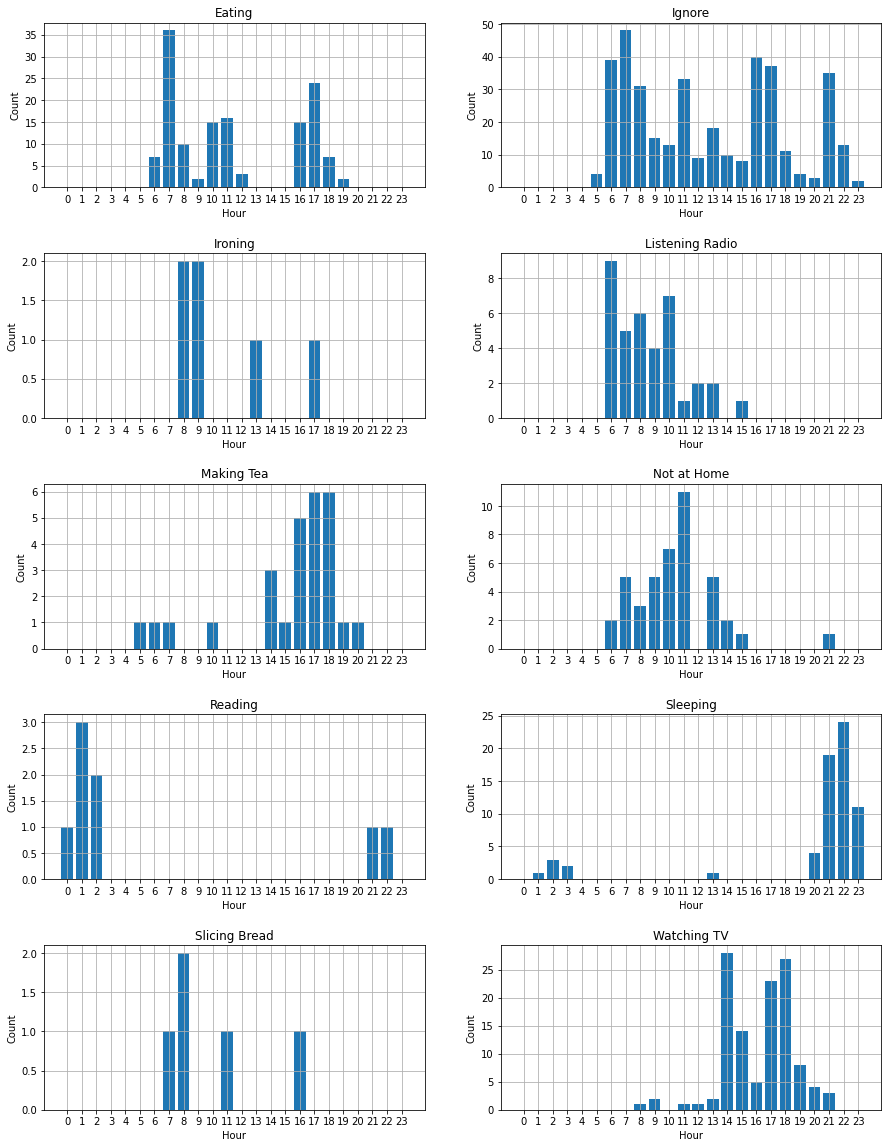

In [9]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()
plt.subplots_adjust(hspace=0.4)
for i, col in enumerate(statistics.columns[1:]):
    axs[i].bar(statistics.Hour, statistics[col])
    axs[i].set_xticks(np.arange(24))
    axs[i].set_ylabel("Count")
    axs[i].set_xlabel("Hour")
    axs[i].set_title(col)
    axs[i].grid(True)

In [10]:
for i, val in enumerate(df_act.duplicated(subset='TimeID')):
    if val == True:
        print(i)

In [11]:
max_ = 0
id_ = 0
arr = []
df_sensor = []
for i in sensors["SensorID"]:
    name = sensors.loc[sensors["SensorID"]==i, "Name"].item()
    location = sensors.loc[sensors["SensorID"]==i, "Location"].item()
    tmp = sensor_history[sensor_history["SensorID"]==i]
    arr.append(i)
    if len(tmp) > max_:
        max_ = len(tmp)
        id_ = i
    data = {
        "Id": i, 
        "Sensor": name, 
        "Location": location,
        "Length": len(tmp)
    }
    df_sensor.append(data)
    
df_sensor = pd.DataFrame(df_sensor)
df_sensor

,Id,Sensor,Location,Length
0,1,Temperature,Kitchen,347290
1,2,Brightness,Kitchen,347286
2,3,Motion,Kitchen,28899
3,4,Temperature,Living Room,366343
4,5,Brightness,Living Room,366338
5,6,Motion,Living Room,13705
6,20,Radio,Kitchen,1591535
7,21,Kettle,Kitchen,1591233
8,22,Iron,Kitchen,1590804
9,23,Mixer,Kitchen,1590562
